<a href="https://colab.research.google.com/github/lerakutt2/myprojects/blob/main/moad2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обработка данных: заполение пропусков, балансировка разными методвми

In [ ]:
import pandas as pd

df = pd.read_csv('/content/CHD.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<Axes: >

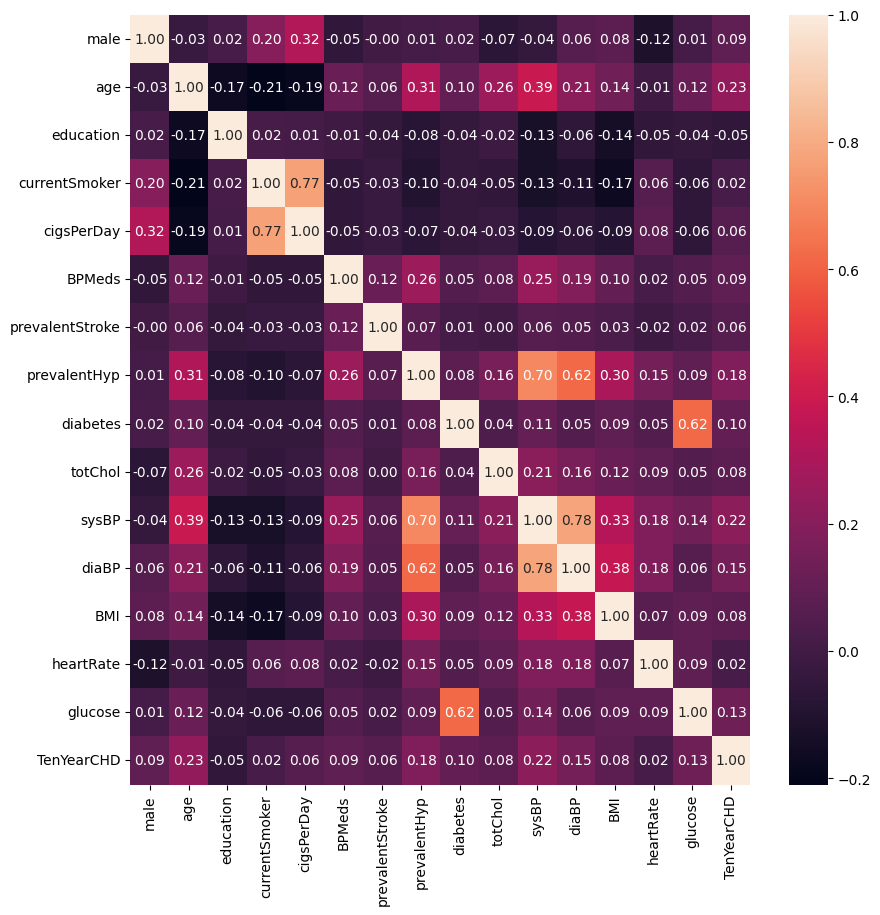

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
cormat = df.corr()
sns.heatmap(round(cormat, 2), annot=True, fmt='.2f')

Можно видеть, что сильно коррелируют признаки:
- гипертония и давление (систолическое и диастолическое)
- уровень глюкокозы и диагностированный сахарный диабет
- курит ли человек и количество выкуриваемых сигарет в день
- систолическое и диастолическое артериальное давление

Эти корреляции отражают закономерности в данных, которые нужно будет учитывать при удалении пропущенных значений.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# смотрим сколько пропущенных значений в процентах
(df.isnull().sum() / len(df)) * 100

,0
male,0.000000
age,0.000000
education,2.476415
currentSmoker,0.000000
cigsPerDay,0.683962
BPMeds,1.250000
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.179245


Работаем с пропущенными значениями

In [ ]:
# заполняем наиболее часто встречающимся значением
display(df['education'].value_counts())
df['education'] = df['education'].fillna(1)
df['education'].isnull().sum()

,count
education,
1.0,1720
2.0,1253
3.0,689
4.0,473


np.int64(0)

In [ ]:
df_tmp = df.loc[df['currentSmoker'] == 1]
df_tmp['cigsPerDay'].describe()

,cigsPerDay
count,2066.000000
mean,18.356244
std,10.866342
min,1.000000
25%,10.000000
50%,20.000000
75%,20.000000
max,70.000000


In [ ]:
# заполняем медианным значением пропущенные значения в столбце с количеством выкуренных сигарет
# только для курящих людей
m1 = (df['currentSmoker'] == 1, 'cigsPerDay')
df.loc[m1] = df.loc[m1].fillna(df.loc[m1].median())
df['cigsPerDay'].isnull().sum()

np.int64(0)

In [ ]:
# смотрим значения глюкозы для людей с диабетом и без
df_tmp = df.loc[df['diabetes'] == 1]['glucose']
print(df_tmp.isnull().sum())
print(df_tmp.describe())
print(df_tmp.median())

df_tmp = df.loc[df['diabetes'] == 0]['glucose']
print(df_tmp.isnull().sum())
print(df_tmp.describe())
print(df_tmp.median())

4
count    105.000000
mean     170.333333
std       84.232242
min       47.000000
25%      110.000000
50%      145.000000
75%      215.000000
max      394.000000
Name: glucose, dtype: float64
145.0
384
count    3747.000000
mean       79.487323
std        12.957198
min        40.000000
25%        71.000000
50%        78.000000
75%        86.000000
max       163.000000
Name: glucose, dtype: float64
78.0


In [ ]:
# заполняем значения глюкозы медианным для людей с диабетом и без
m1 = (df['diabetes'] == 1, 'glucose')
m2 = (df['diabetes'] == 0, 'glucose')
df.loc[m1] = df.loc[m1].fillna(df.loc[m1].median())
df.loc[m2] = df.loc[m2].fillna(df.loc[m2].median())
df['glucose'].isnull().sum()

np.int64(0)

In [ ]:
# смотрим как часто люди с гипертонией и без принимали лекарства от гипертонии
df_tmp = df.loc[df['prevalentHyp'] == 1]['BPMeds']
print(df_tmp.isnull().sum())
print(df_tmp.value_counts())
print(df_tmp.describe())
print(df_tmp.median())

df_tmp = df.loc[df['prevalentHyp'] == 0]['BPMeds']
print(df_tmp.isnull().sum())
print(df_tmp.describe())

22
BPMeds
0.0    1171
1.0     124
Name: count, dtype: int64
count    1295.000000
mean        0.095753
std         0.294366
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64
0.0
31
count    2892.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: BPMeds, dtype: float64


96% людей с гипертонией и 100% людей без гипертонии не принимают лекарства от гипертонии, поэтому пустые значения мы заменяем нулями.

In [ ]:
df['BPMeds'] = df['BPMeds'].fillna(0)

In [ ]:
display(df['totChol'].describe())
df['BMI'].describe()

,totChol
count,4190.000000
mean,236.699523
std,44.591284
min,107.000000
25%,206.000000
50%,234.000000
75%,263.000000
max,696.000000


,BMI
count,4221.000000
mean,25.800801
std,4.079840
min,15.540000
25%,23.070000
50%,25.400000
75%,28.040000
max,56.800000


In [ ]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score

def logit_analysis(x, y):
  logit_model = sm.Logit(y, x)
  res = logit_model.fit()
  print(res.summary2())


def log_reg(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  logreg = LogisticRegression(max_iter=10000)
  logreg.fit(x_train, y_train)

  y_pred = logreg.predict(x_test)
  print("Площадь под ROC-кривой: ", roc_auc_score(y_test, y_pred))
  logit_analysis(x, y)


In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler

x1 = df.copy()
y1 = x1.pop('TenYearCHD')
log_reg(x1, y1)

smote = SMOTE(sampling_strategy = 1.0, random_state=42)
x_res, y_res = smote.fit_resample(x1, y1)
print("========================SMOTE===========================")
log_reg(x_res, y_res)

smote = BorderlineSMOTE(sampling_strategy = 1.0, random_state=42)
x_res, y_res = smote.fit_resample(x1, y1)
print("========================BorderlineSMOTE===========================")
log_reg(x_res, y_res)

smote = SVMSMOTE(sampling_strategy = 1.0, random_state=42)
x_res, y_res = smote.fit_resample(x1, y1)
print("========================SVMSMOTE===========================")
log_reg(x_res, y_res)

smote = KMeansSMOTE(sampling_strategy = 1.0, random_state=42)
x_res, y_res = smote.fit_resample(x1, y1)
print("========================KMeansSMOTE===========================")
log_reg(x_res, y_res)

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x1, y1)
print("========================RandomOverSampler===========================")
log_reg(x_res, y_res)

Площадь под ROC-кривой:  0.5445396757374473
Optimization terminated successfully.
         Current function value: 0.397463
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: TenYearCHD       Pseudo R-squared: 0.067     
Date:               2025-06-03 07:36 AIC:              3400.4870 
No. Observations:   4240             BIC:              3495.7718 
Df Model:           14               Log-Likelihood:   -1685.2   
Df Residuals:       4225             LL-Null:          -1806.1   
Converged:          1.0000           LLR p-value:      1.4760e-43
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
male               0.3768   0.0969  3.8864 0.0001  0.1868  0.5668
age                0.0

Лучше всего работает KMeansSMOTE

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

def svm(x_train, y_train):
  x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
  all_scores = []
  # C = [0.1, 0.5, 1, 2, 5, 10, 100, 200]
  # kernels = ['linear', 'poly', 'rbf', 'sigmoid']
  C = [0.1, 1, 10]
  kernels = ['linear', 'rbf']
  # param_grid = [
  #   {'C': [0.1, 0.5, 1, 2, 5, 10, 100, 200],
  #    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
  # ]

  # grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="f1", n_jobs=-1)
  # print('before')
  # grid.fit(x_train, y_train)
  # print('after')
  # best_model = grid.best_estimator_

  # y_pred = best_model.predict(x_test)
  # y_proba = best_model.predict_proba(x_test)[:, 1]

  for c in C:
    print(c)
    for k in kernels:
      print(k)
      # создание SVM модели с заданной комбинацией параметров
      clf = SVC(kernel=k, C=c)
      print('before cv')
      # кросс-валидация с использованием метрики f1
      scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='f1')
      print('after cv')
      # сохранение всех параметров и среднего метрик кросс-валидации
      all_scores.append([c, k, scores.mean()])
  scores = pd.DataFrame(all_scores)
  # params = []
  display(scores)
  # показывает при каких параметрах в каждом датасете достигается самая высокая точность
  # display(scores[scores[3] == scores[scores[0] == i][3].max()])

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# from reg_knn_baes_utils import (
#     evaluate_model,
#     plot_confusion_matrix,
#     plot_roc_curve,
#     analyze_with_statsmodels
# )



def svm1(X, y):
  # Конфигурации моделей SVM
  svm_models = {
      "SVM_Linear": SVC(kernel="linear", probability=True, random_state=42),
      "SVM_RBF": SVC(kernel="rbf", probability=True, random_state=42)
  }

  # Гиперпараметры для подбора (можно расширить при желании)

  param_grid = {
      "SVM_Linear": {"C": [0.1, 1, 10]},
      "SVM_RBF": {"C": [0.1, 1, 10],
      "gamma": [0.01, 0.1, 1]}
  }
  # param_grid = [
  #   {'C': [0.5, 1, 10],
  #    'kernel': ['linear', 'rbf']}
  # ]
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42
  )

  # for model_name, model in svm_models.items():
  #     print(f"\n=== {model_name} === ")

  pipeline = Pipeline([
      ("scaler", StandardScaler()),
      ("svc", SVC())
  ])

  for model_name, model in svm_models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC())
    ])
    grid = GridSearchCV(model, param_grid[model_name], cv=3, verbose=1, scoring="f1", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    print(f'ROC AUC score {roc_auc_score(y_test, y_pred)}')
      # evaluate_model(y_test, y_pred, y_proba, title=f"{model_name} - {dataset_name}")
      # plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix: {model_name} - {dataset_name}")
      # plot_roc_curve(y_test, y_proba, title=f"ROC Curve: {model_name} - {dataset_name}")

      # Статистический анализ на тренировочной выборке
      # analyze_with_statsmodels(X_train, y_train)

In [ ]:
smote = KMeansSMOTE(sampling_strategy = 1.0, random_state=42)
x_res, y_res = smote.fit_resample(x1, y1)
svm1(x1, y1)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
ROC AUC score 0.5228555103206913
Fitting 3 folds for each of 9 candidates, totalling 27 fits
ROC AUC score 0.5051496321691308


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

def svm(x_train, y_train):
  all_scores = []
  C = [0.1, 0.5, 1, 2, 5, 10, 100, 200]
  kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

  for c in C:
    for k in kernels:
      # создание SVM модели с заданной комбинацией параметров
      clf = SVC(kernel='linear', C=c)
      # кросс-валидация с использованием метрики f1
      scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='f1')
      # сохранение всех параметров и среднего метрик кросс-валидации
      all_scores.append([c, k, scores.mean()])
  scores = pd.DataFrame(all_scores)
  # params = []
  display(scores)

In [ ]:
def svm2(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
  clf = SVC(kernel='linear', C=c)
